# Midterm
## Tasks
### 1. Make the truth tables of following statements
### with the help of PyDatalog:
* (A∨¬A)↔B
* A∨B
* (A→B)∧(B→A)
* (A∨(B∧¬A))∨(A∨¬(B∨A))

### 2. Calculate the measure of ρ(0.6/b1+0.4/b2+0.7/b3) of following relationship, 
### norm is operator of multiplication and conorm is max
### 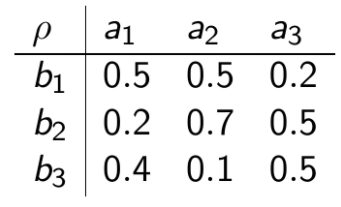

### 3 Make the PyDatalog statements of the following anecdot story of Mark Twain:
“After long years as a bachelor I was tired of being alone and married a
widow with a grown daughter. My father fell in love with the daughter
and took her as his wife. This made me my own son-in-law and my
stepdaughter became my mother. After a year my wife gave birth to a
son. Now, my son was my father’s brother-in-law and at the same time
my uncle, since he was my stepmother’s brother. But my father’s wife also
gave birth to a son. So this was my brother and also my grandson, since
he was the son of my daughter. This meant I’d married my grandmother,
since she was the mother of my mother. As my wife’s husband, I was
also her grandson. And since the husband of a grandmother is always a
grandfather, I am my own grandfather.”

### 4 Using the scikit-fuzzy solve the following control system:
The car should move at a speed of at least 60 kmh along the street away from the traffic lights. The car should stop at the intersection on a red traffic light. If the traffic light flashes amber, then the car must cross the intersection at a speed below 40 kmh. If the rules are violated, the car gets into an accident.
The traffic light mode: red, red and yellow, green, green flashing, yellow, red, etc.
Simplified mode of traffic lights: red, yellow, green, yellow, red, etc.
The traffic light may not work (off), the traffic light may flash yellow, the traffic light may be broken (all three signals are switched on simultaneously).
The signal from the system of technical vision is not always 100% reliable.
The vision system processes video images received from a television camera. The image of the traffic light is recognized during image processing. At the output of the system, a signal is generated from the distance to the traffic light and the color signal of the traffic light. The distance signal to the traffic light is measured in meters. If the traffic light is not found or the distance to it is over 140 m, then the value of this signal is 140 m.
Antecednets (Inputs) variables:
* distance to the traffic light,
* the color of the traffic light,
* speed.

The Consequents (Outputs) variable is 
* the speed change.



In [3]:
from pyDatalog import pyDatalog
import logging
from pyDatalog import pyEngine
pyEngine.Logging = True
logging.basicConfig(level=logging.INFO)

from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from sqlalchemy import Column, Integer, String, ForeignKey

# define a base class with SQLAlchemy and pyDatalog capabilities
Base = declarative_base(cls=pyDatalog.Mixin, metaclass=pyDatalog.sqlMetaMixin)
# create database in memory
engine = create_engine('sqlite:///:memory:', echo=False)

# open a session on a database, then associate it to the Base class
Session = sessionmaker(bind=engine)
session = Session()
Base.session = session

class Person(Base): # Employee inherits from the Base class
    __tablename__ = 'person' # data are stored in the Employee table

    name = Column(String, primary_key=True)
    
    def __init__(self, name): 
        # call the initialization method of the Mixin class
        super(Person, self).__init__()
        self.name = name
    
    def __repr__(self): # specifies how to display an Employee
        return self.name
    
Me = Person('Me')
Father = Person('Father')
Widow = Person('Widow')
Daughter = Person('Daughter')
myChild = Person('myCHild')
fatherChild = Person('fatherChild')

pyDatalog.create_terms('p,married,grandParent,X,Y,Z')
+p(Father,Me)
+p(Widow,Daughter)
+married(Me,Widow)
+married(Father,Daughter)
+p(Me,myChild)
+p(Father,fatherChild)

married(X,Y) <= married(Y,X)
p(Y,Z) <= married(X,Y) & p(X,Z)
grandParent(X,Z) <= p(X,Y) & p(Y,Z) 

print(grandParent(X,Y))

INFO:pyDatalog.pyEngine:New fact : married('Father','Daughter')
INFO:pyDatalog.pyEngine:New fact : married('Daughter','Father')
INFO:pyDatalog.pyEngine:New fact : p('Father','fatherChild')
INFO:pyDatalog.pyEngine:New fact : married('Me','Widow')
INFO:pyDatalog.pyEngine:New fact : p('Father','Me')
INFO:pyDatalog.pyEngine:New fact : p('Daughter','fatherChild')
INFO:pyDatalog.pyEngine:New fact : married('Widow','Me')
INFO:pyDatalog.pyEngine:New fact : p('Daughter','Me')
INFO:pyDatalog.pyEngine:New fact : married('Father','Daughter')
INFO:pyDatalog.pyEngine:New fact : p('Me','myCHild')
INFO:pyDatalog.pyEngine:New fact : married('Father','Daughter')
INFO:pyDatalog.pyEngine:New fact : p('Widow','myCHild')
INFO:pyDatalog.pyEngine:New fact : p('Widow','Daughter')
INFO:pyDatalog.pyEngine:New fact : married('Father','Daughter')
INFO:pyDatalog.pyEngine:New fact : p('Daughter','fatherChild')
INFO:pyDatalog.pyEngine:New fact : p('Daughter','Me')
INFO:pyDatalog.pyEngine:New fact : married('Daughter'

X        | Y          
---------|------------
Widow    | fatherChild
Widow    | Me         
Father   | Daughter   
Father   | myCHild    
Me       | fatherChild
Me       | Me         
Widow    | Me         
Widow    | fatherChild
Daughter | Daughter   
Daughter | myCHild    
Father   | Daughter   
Father   | myCHild    
Me       | Me         
Me       | fatherChild
Daughter | Daughter   
Daughter | myCHild    
